## EDA of international Football Matches

In this notebook we will take a closer look into the evolution of international football matches (i.e. matches played between countries) through the years.

#### Questions to be explored:
- How the international football scenario change over the years?    
    - More games? Did the week days the games happened changed?
    - Did the home team used to win more or that value is stable?
    - Teams from different continents play with each other more or less today than they did in the past?
    - Did more different teams win games today than in the past? (não existe mais bobo no futebol)
- How is the performance of a winning world cup team in the years the preceed the tournament?
- How is Brazil comming to this World Cup comparing to the recent World Cups?


#### Columns of results.csv:
- **date**: Date of the match
- **home_team**: Name of the home team
- **away_team**: Name of the away team
- **home_score**: Home team goals
- **away_score**: Away team goals
- **tournament**: Tournament name
- **city**: City where the match took place
- **country**: Country where the match took place.
- **neutral**: Whether the match took place at a neutral venue or not.

In [1]:
# IMPORTS

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
# Start the analysis by reading the results file from the "data" folder
df_results = pd.read_csv("data/results.csv")

# Convert the date column to datetime
df_results['date']  = pd.to_datetime(df_results['date'])

print(f"There are {len(df_results)} matches")
print(f"The first game was {df_results['date'].min().date()} and the last was {df_results['date'].max().date()}")

df_results.head(5)

There are 43752 matches
The first game was 1872-11-30 and the last was 2022-06-14


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [52]:
# Creating some new columns that might be usefull

def get_game_outcome ( home_score, away_score):
    """
    The outcome will be encoded as:
        - D: Draw
        - H: Home team wins
        - A: Away team wins
    """
    if (home_score == away_score):
        return 'D'
    elif (home_score > away_score):
        return 'H'
    elif (home_score < away_score):
        return 'A'

def winning_team(home_team, away_team, outcome):
    if (outcome == 'H'):
        return home_team
    elif (outcome == 'A'):
        return away_team
    else:
        return '-'

def losing_team(home_team, away_team, outcome):
    if (outcome == 'A'):
        return home_team
    elif (outcome == 'H'):
        return away_team
    else:
        return '-'

# The outcome of the game
df_results['outcome'] = df_results.apply(lambda x: get_game_outcome(x.home_score, x.away_score), axis=1)

# Name of the winning team
df_results['winning_team'] =  df_results.apply(lambda x: winning_team(x.home_team, x.away_team, x.outcome), axis=1)

# Name of the losing team
df_results['losing_team'] =  df_results.apply(lambda x: losing_team(x.home_team, x.away_team, x.outcome), axis=1)

# Score difference
df_results['score_difference'] = df_results.apply(lambda x: abs(x.home_score - x.away_score), axis=1)

# Teams envolved on the match
df_results['teams_envolved'] = df_results.apply(lambda x: [x.home_team, x.away_team], axis = 1)

# Year of the game
df_results['year'] = df_results['date'].apply(lambda x: x.year)

# Month of the game
df_results['month'] = df_results['date'].apply(lambda x: x.month_name())

# Day of the game
df_results['day'] = df_results['date'].apply(lambda x: x.day)

# Day of the week of the game
df_results['day_name'] = df_results['date'].apply(lambda x: x.day_name())

# The home team actually play at home?
df_results['home_playing_home'] = df_results.apply(lambda x: 'y' if x.home_team == x.country else 'n', axis = 1)

In [53]:
df_geo_regions = pd.read_csv('data/geographic-regions.csv')
df_geo_regions.fillna('-', inplace = True)
df_geo_regions.rename(columns = {'Country or Area':'country', 'Region Name':'continent'}, inplace = True)

missing_countries_dict = {
                            'England':'Europe',
                            'Scotland':'Europe',
                            'Wales':'Europe',
                            'Turkey':'Europe',
                            'Tanzania':'Africa',
                            'China PR':'Asia',
                            'Republic of Ireland':'Europe',
                            'Iran':'Asia',
                            'Northern Ireland':'Europe',
                            'Russia':'Europe',
                            'Ivory Coast':'Africa',
                            'Yugoslavia':'Europe',
                            'Hong Kong':'Asia',
                            'Bolivia':'America',
                            'Czechoslovakia':'Europe',
                            'Venezuela':'America',
                            'Soviet Union':'Europe',
                            'Czech Republic':'Europe',
                            'Vietnam':'Asia',
                            'German DR':'Europe',
                            'Syria':'Asia',
                            'Malaya':'Asia',
                            'Moldova':'Europe',
                            'DR Congo':'Africa',
                            'Cape Verde':'Africa',
                            'Netherlands Antilles':'America',
                            'Vietnam Republic':'Asia',
                            'Zaïre':'Africa',
                            'Taiwan':'Asia',
                            'Laos':'Asia'
}

df_merged = df_results.merge(df_geo_regions[['country','continent']], how = 'left', on ='country')
df_merged['continent'] = df_merged['continent'].fillna('-')
df_merged['continent'] = df_merged.apply(lambda x: missing_countries_dict.get(x.country, "not found") if x.continent == '-' else x.continent, axis=1 )
#df_merged[df_merged['Region Name'].isna() == True]['country'].value_counts().head(50)

1872       1
1873       1
1874       1
1875       1
1876       2
        ... 
2018     908
2019    1161
2020     299
2021    1087
2022     593
Name: year, Length: 151, dtype: int64

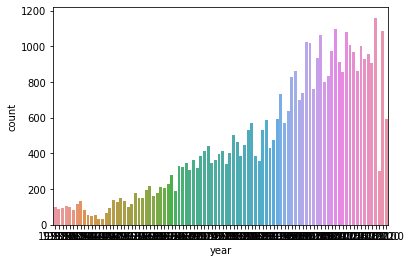

In [61]:


sns.countplot(data = df_merged.where(df_merged['year'] > 1930), x = 'year')
df_merged['year'].value_counts(sort = False)

In [64]:
# Count how many different teams played international matches in each year
df_merged.groupby(by = 'year').count()['teams_envolved']

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,outcome,winning_team,losing_team,score_difference,teams_envolved,month,day,day_name,home_playing_home,continent
year,,,,,,,,,,,,,,,,,,,
1872,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1873,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1874,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1875,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1876,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908
2019,1161,1161,1161,1161,1161,1161,1161,1161,1161,1161,1161,1161,1161,1161,1161,1161,1161,1161,1161
2020,299,299,299,299,299,299,299,299,299,299,299,299,299,299,299,299,299,299,299


In [21]:
math.isnan(df_merged.iloc[43751]['continent'])

TypeError: must be real number, not str

In [23]:
type(df_merged.iloc[0]['continent'])

if (df_merged.iloc[0]['continent'] == math.nan):
    print( 'oi')

In [25]:
df_merged['continent'].fillna('-')

0             -
1             -
2             -
3             -
4             -
          ...  
43747         -
43748    Europe
43749      Asia
43750      Asia
43751      Asia
Name: continent, Length: 43752, dtype: object